# Linear Regression
- ML Algorithm based on supervised learning that is commonly used for predictive analysis.
- Used to determine the linear relationship between the dependent variable (y) and independent variable (x). This linear relationship is represented by a straight line called regression line / best-fit line. This line is the pattern on which the machine has learned from the data.
- Used for predicting the output of quantitative type (continuous value) eg. Age, salary, price etc.

##### Simple Linear Regression: 
- one X variable and one Y variable 
- Formula: **y = mx + c** 
        y is the response or target variable   
        x is the predictor variable
        m is the coefficient of x
        c is the intercept
 

##### Multiple Linear Regression: 
- one Y variable and two or more X variable 
- Formula: **y = m1x1 + m2x2.....+ mnxn** 
        y is the target variable
        x1, x2, x3..xn represents the features.
        m1, m2, m3....mn are the coefficients of each feature ie., x1, x2, x3.. respectively.
        
       
## Cost Function
* It is a function that signifies how much the predicted values are deviated from the actual values.<br>
* MSE is the most commonly used cost function for Linear Regression. MSE is average of the sum of squared difference between the predicted and actual value. Output of MSE is the single number representing the cost.


# Gradient Descent 
* It is an optimization algorithm used for minimizing the cost function. It's based on a convex function and tweaks its parameters iteratively to minimize a given function to its global minimum. It helps to get optimal value for the slope m which provides the best fit line.<br>
* Our aim is to minimize the error between the predicted values and the actual values.<br>


* The gradient descent curve has the cost function and slope values. This algorithm intially starts with a randomnly selected m value and from there it uses calculus to iteratively adjust the values of m and calculate cost function for all the slopes. So it takes all the error value and search for minimum error.  Once it finds the m that has minimum error, it creates a best fit line using that m.

* For the randomly selected m, it might not result in global minimum. So we need to move down and for that we use convergence theorem

* Learning rate should be a small value ranging between 0.1 to 0.0000001.

* To find the derivative of slope, we need to draw a tangent from that point. 

* If the right-hand side of the tangent is facing towards down then its a negative slope. So the derivative of that slope will also be negative. Hence we need to increase the m value to move towards the global minima.

* If the right-hand side of the tangent faces towards the left, then its a positive slope. So the derivative of the slope will be positive. We need to reduce the m value so it will move towards the global minima. 

### $R^2$ statistics

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :
<img src="RSquared.PNG" width="300">
                                              
Where RSS:  is  the Residual Sum of squares and is given as :
<img src="RSS.PNG">
                                                                
RSS is the residual(error) term we have been talking about so far.
And, TSS:  is  the Total sum of squares and given as :
<img src="TSS.PNG">
                                                             
TSS is calculated when we consider the line passing through the mean value of y, to be the best fit line.
Just like RSS, we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.
    <img src="TSS2.PNG">
    
The closer the value of R2 is to 1 the better the model fits our data. If R2 comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.


### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.
Let’s understand this with an example:
 
<img src="adjr.PNG" width="300">
We can see that R2 always increases with an increase in the number of independent variables.
Thus, it doesn’t give a better picture and so we need Adjusted R2 value to keep this in check.
Mathematically, it is calculated as:
                                        <img src="adjr2.PNG">
In the equation above, when p = 0, we can see that adjusted R2 becomes equal to R2.
Thus, adjusted R2  will always be less than or equal to R2, and it penalises the excess of independent variables which do not affect the dependent variable.


## Business Case:-Prediciting the chances of admission with given features

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
## Importing data
data=pd.read_excel('Admission_Prediction.xlsx')
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [4]:
## Getting the some rows of data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


## Basic understanding of features-- Domain Analysis
GRE Score:-The graduate record examination (GRE) is a standardized exam used to measure one's aptitude for abstract thinking in the areas of analytical writing, mathematics, and vocabulary. The GRE is commonly used by many graduate schools in the U.S. and Canada to determine an applicant's eligibility for the program.

TOEFL Score:-TOFEL Score is a standardized test to measure the English language ability of non-native speakers wishing to enroll in English-speaking universities.

University Rating:-Rating of university

SOP:-Statement of Purpose, a reflection of your personality that you portray in front of the admission committee (Adcom) for getting enrolled in universities abroad.


LOR:-Letter of Recommendation.The LOR is a document that provides the admission officers with a comprehensive insight into your suitable candidature, for admission into the concerned University.

CGPA:-CGPA stands for Cumulative Grade Points Average. CGPA is nothing but the average of grade points obtained by students in all the subjects excluding the 6th subject.

Research:-Whether the student has done the research or not

Chance of Admit:-Target variable and we need to claculate percentage of getting admission.

## Basic Checks

In [9]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 9)

In [10]:
data.describe()
## Serial No is unique identity of the dataset.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
data.info()
## There seems to be missing values in GRE,TOFEL,UR features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


## Exploratory Data Analysis

### Univariate Analysis-- Analyzing single variable 

In [13]:
## Renaming certain columns just to make analysis easy
data.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score',
                     'University Rating':'University_Rating',
                     'Chance of Admit':'Chance_of_Admit'}
            ,inplace=True)
data

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [14]:
data.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

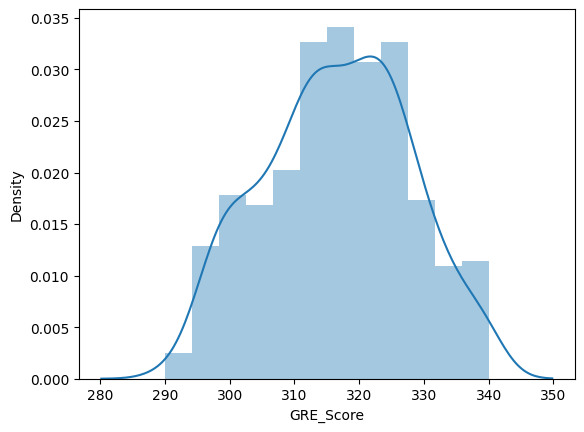

In [19]:
## ANalyszing GRE Score
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data.GRE_Score.dropna(axis=0))
## Normal distribution
## The data is concentrated between 310 to 330.
plt.show()


<Axes: xlabel='TOEFL_Score', ylabel='Density'>

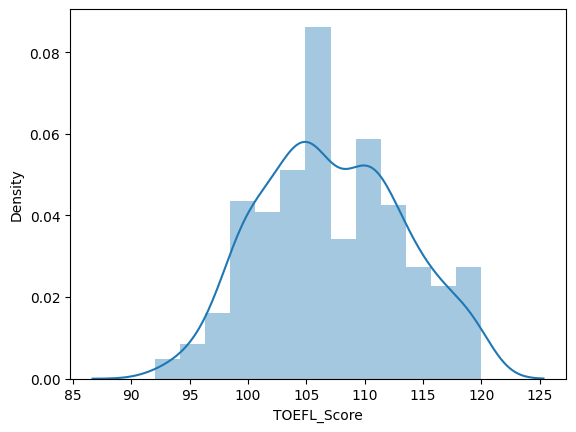

In [20]:
## ANalsyzing TOEFL_Score
sns.distplot(data.TOEFL_Score.dropna(axis=0))
## Normally distributed.

In [21]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [22]:
## Analaysizng University_Rating
##sns.distplot(data.University_Rating.dropna(axis=0))
#3sns.countplot(x='University_Rating',data=data)
data.University_Rating.value_counts()
## Most of the university has rating of 3.
## 72 universities seems to be good one.
## 32 universities are worst performing.

University_Rating
3.0    154
2.0    124
4.0    103
5.0     72
1.0     32
Name: count, dtype: int64

<Axes: xlabel='SOP', ylabel='count'>

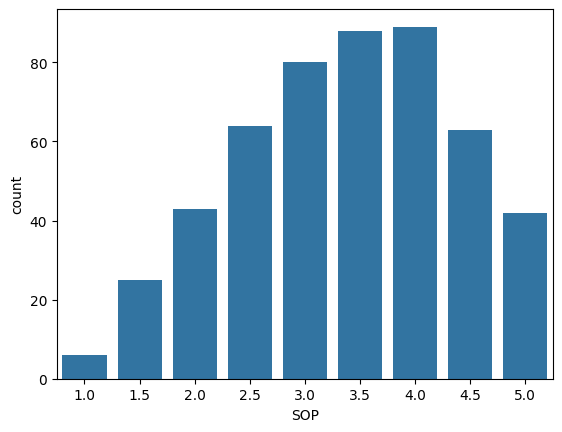

In [23]:
## Analayzing SOP
##data.SOP.value_counts()
## There are very less students who are able to impress the admission committee 
sns.countplot(x='SOP',data=data)

<Axes: xlabel='LOR', ylabel='count'>

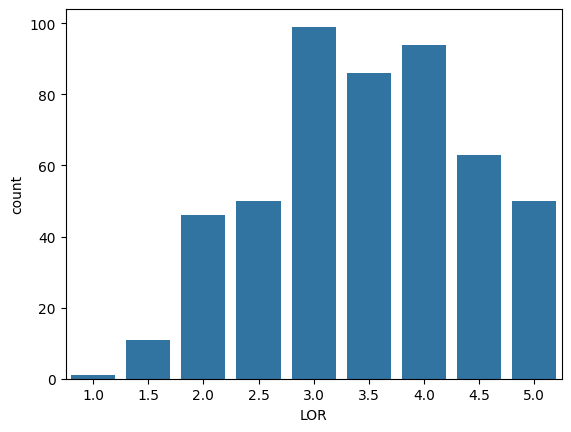

In [24]:
## Analysizng LOR
##data.LOR.value_counts()
## Average candidates have applied for admission.
sns.countplot(x='LOR',data=data)

<Axes: xlabel='CGPA', ylabel='Density'>

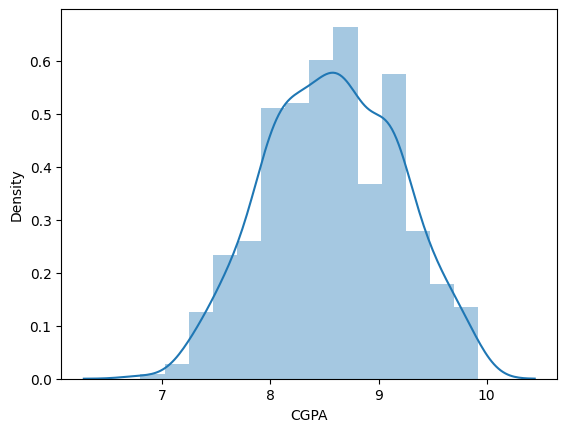

In [25]:
## Analyzing CGPA
sns.distplot(data.CGPA)
## Most of students have CGPA in range of 8 to 9.

<Axes: xlabel='Research', ylabel='count'>

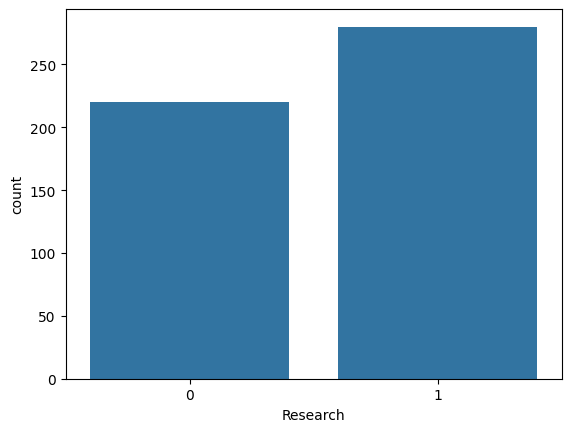

In [26]:
## Analyzing  Research
sns.countplot(x='Research',data=data)
## The distribution seems to be balanced however the 
##students done research are more.

<Axes: xlabel='Chance_of_Admit', ylabel='Density'>

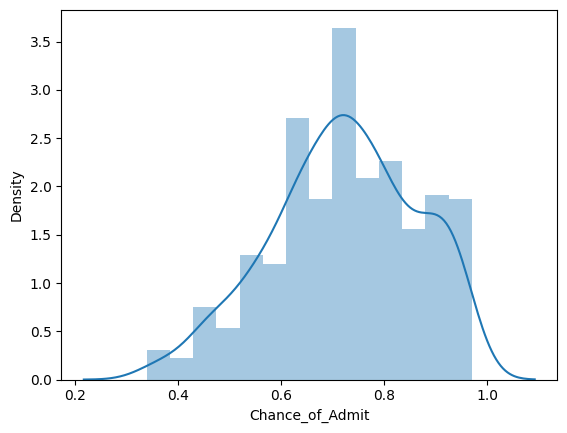

In [27]:
## Analsyzing target variable
sns.distplot(data.Chance_of_Admit)

### Bivariate Analysis-->Analyzing 2 variables at a time.

In [28]:
data1=data[['GRE_Score', 'TOEFL_Score', 'University_Rating', 
            'SOP','LOR', 'CGPA', 'Research']]

In [29]:
data1

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,NaN,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


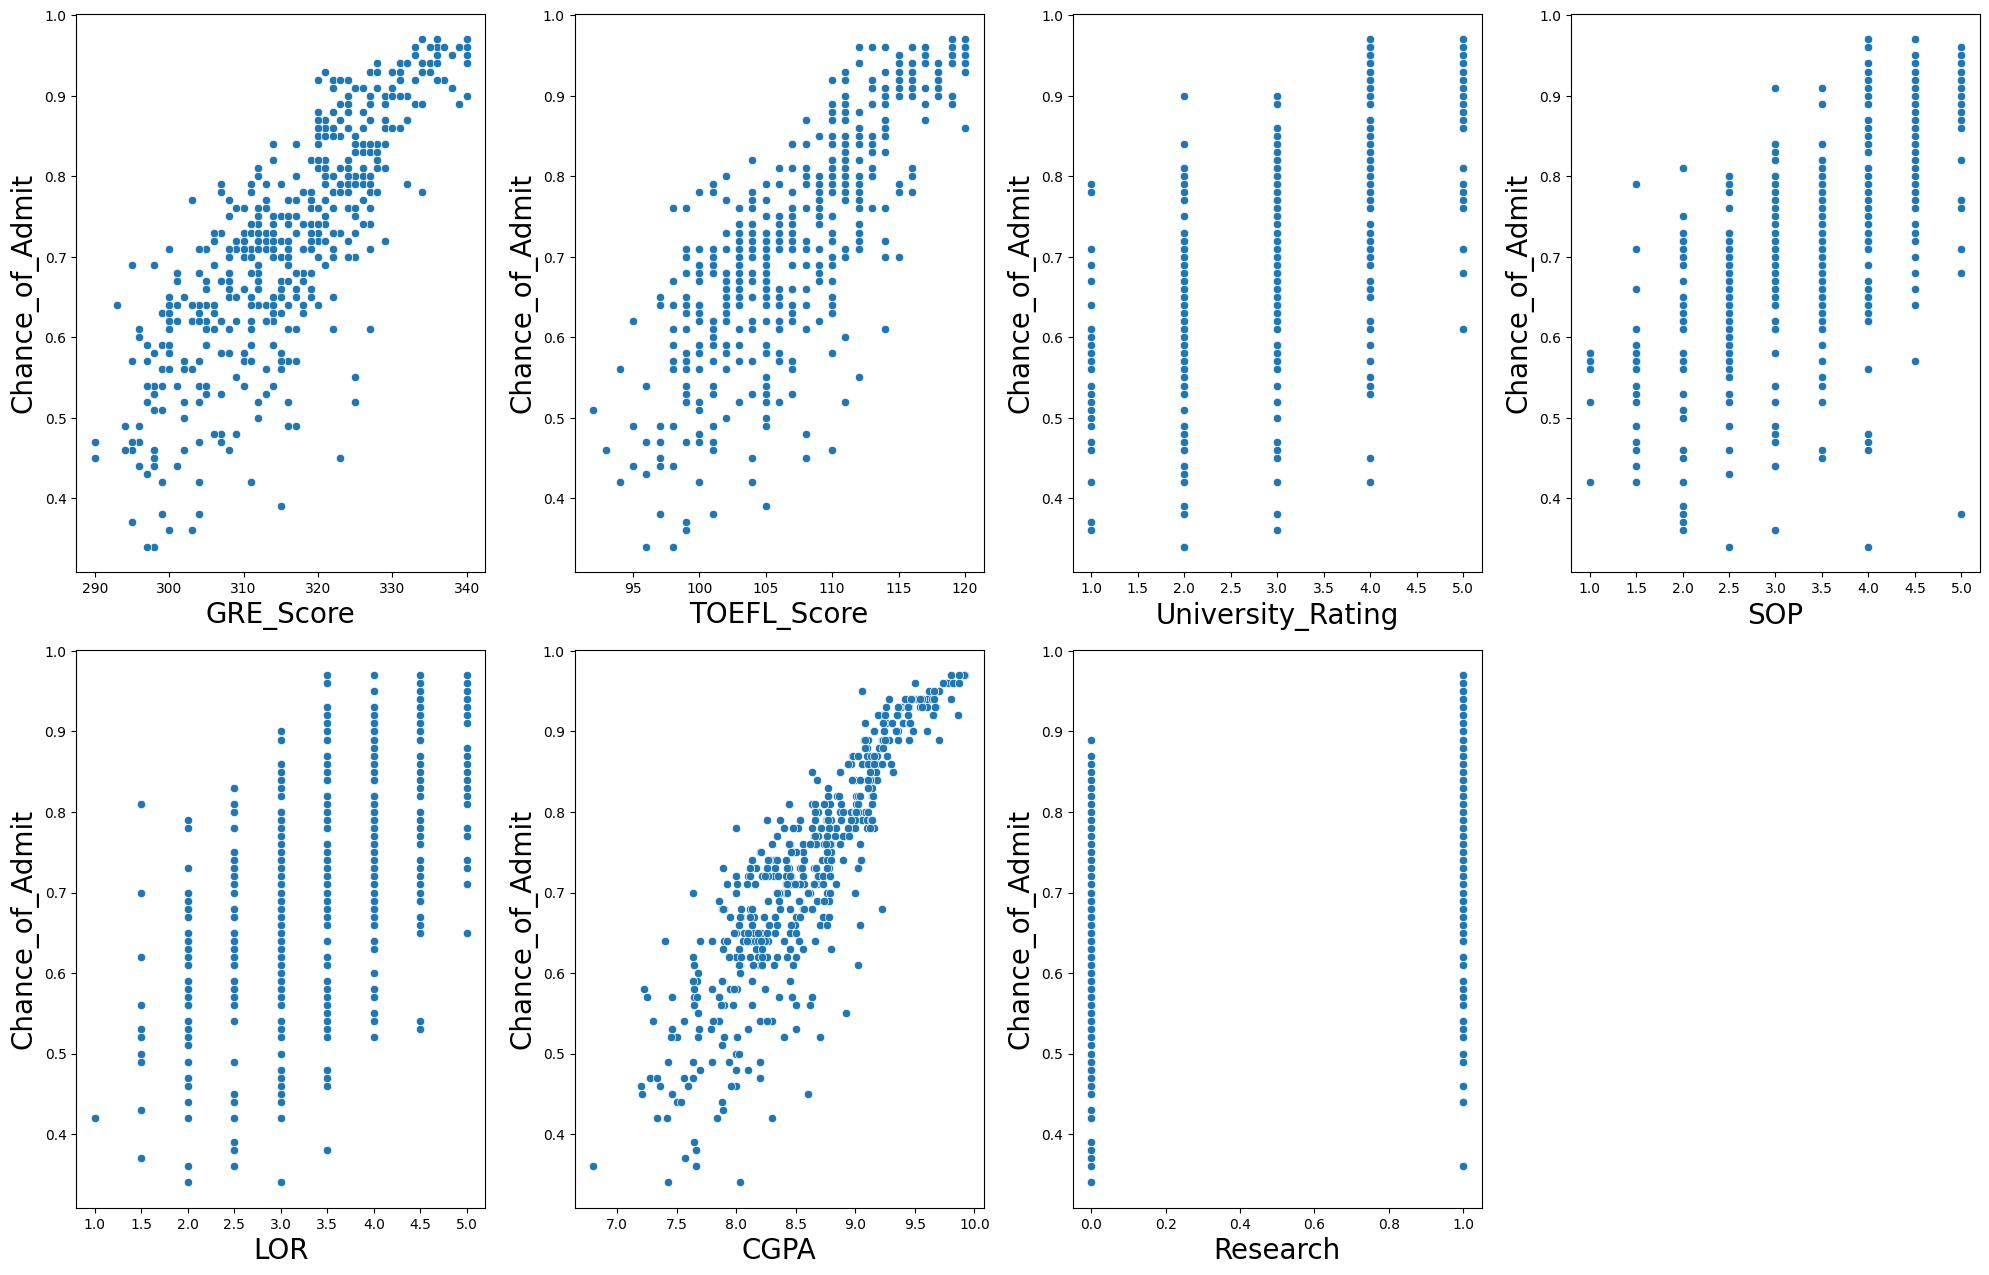

In [30]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graph
        sns.scatterplot(x=data1[column].dropna(axis=0)#scatter plot
                        ,y=data.Chance_of_Admit)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Chance_of_Admit',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

## Bivariate and Multivariate Analysis

## Data Preprocessing

In [31]:
## Checking missing values
data.isnull().sum()

Serial No.            0
GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64

In [32]:
## Imputing the missing values 
## Since GRE score,TOEFL score has shown normal distribution so mean can be better substitute to impute missing values.
## University rating is ordinal data so mode imputation can be used.

In [33]:
## Getting the rows where values got missed
#data.loc[data['GRE_Score'].isnull()==True

In [34]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [36]:
from scipy import stats
stats.mode(data.University_Rating)

ModeResult(mode=3.0, count=154)

In [37]:
## Impuation using inbuild method fillna.
data['University_Rating'] = data['University_Rating'].fillna(data['University_Rating'].mode()[0])

data['TOEFL_Score'] = data['TOEFL_Score'].fillna(data['TOEFL_Score'].mean())

data['GRE_Score']  = data['GRE_Score'].fillna(data['GRE_Score'].mean())

In [38]:
data.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [39]:
data.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

# checking for outlier 

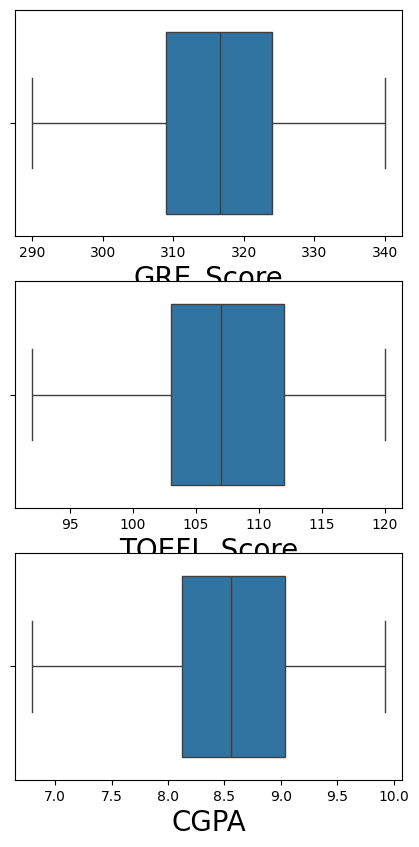

In [40]:
## Lets check outliers in any
box=data[['GRE_Score', 'TOEFL_Score','CGPA']]
plt.figure(figsize=(5,10), facecolor='white')#to sey canvas size
plotnumber = 1#counter

for column in box:#acc
    if plotnumber<=6 : # as there are 9 columns in the data
        ax = plt.subplot(3,1,plotnumber)#plotting 3 graphs
        sns.boxplot(x=box[column])#boxplot to check for outlier
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1#counter increment 
plt.show()#to show plot

In [41]:
## There seems to be no outliers

In [42]:
## Skweness and Kurtosis test i.e check for normality
from scipy import stats
for column in box:
    print(stats.skew(box[column]),column)

-0.05231732520434785 GRE_Score
0.1027880861342189 TOEFL_Score
-0.02653261314181717 CGPA


In [43]:
for column in box:
    print(stats.kurtosis(box[column]),column)

-0.6183261354443954 GRE_Score
-0.6224728502117052 TOEFL_Score
-0.5676573553864674 CGPA


In [44]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [45]:
## Scaling the data.As we will implement linear regression so we need to make all numerical features into same sacle.
## From the EDA stage we have found all numericla variables are normally distributed so we can apply 
## Standard scaler.

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
data[['GRE_Score', 'TOEFL_Score','CGPA']]= sc.fit_transform(data[['GRE_Score', 'TOEFL_Score','CGPA']])

In [48]:
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1,0.92
1,2,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1,0.76
2,3,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1,0.72
3,4,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1,0.80
4,5,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0,0.65


## Feature Selection

In [49]:
## Feature selection is done to get that specific features which are important to predict the 
## the target varaible.

## First remove the redundant colunms i.e serial no,customer id,ids
## In second step remove constant columns,the columns not providing information.
## i.e standard deviation=0

In [50]:
## Dropping columns that are not required
data.drop(['Serial No.'],axis=1,inplace=True)

In [51]:
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1,0.92
1,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1,0.76
2,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1,0.72
3,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1,0.80
4,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0,0.65


In [ ]:
## Third step is Checking correlation i.e checking the linear relation between 2 variables.
sns.heatmap(data.drop('Chance_of_Admit',axis=1).corr(),annot=True)

In [ ]:
## There seems to be relationship between GRE and TOFEL score,CGPA however the relationship is not 
# that strong.So we will not drop further any features

## Model Building

In [ ]:
## Defining independent and dependent variables
X=data.iloc[:,0:-1]
y=data.Chance_of_Admit

In [ ]:
data.head()

In [ ]:
X=data.iloc[:,0:7] ## independent variables
y=data.Chance_of_Admit ## dependent or target variable.

In [ ]:
X

In [ ]:
## Definiging training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [ ]:
## Model creation
from sklearn.linear_model import LinearRegression ## importing the model library 

LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data.

y_hat=LR.predict(X_test) ## prediciton from model

In [ ]:
y_h=LR.predict(X_train)

## Model Evaluation

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


train_score=r2_score(y_train,y_h)
train_score

In [ ]:
test_score=r2_score(y_test,y_hat)
test_score

In [ ]:
# Mean Squared Error & Mean Absolute Error
print("MSE: ", mean_squared_error(y_test, y_hat))
print("MAE: ", mean_absolute_error(y_test, y_hat))

In [ ]:
# RMSE
import math
print(math.sqrt(mean_squared_error(y_test,y_hat))) # root mean squared error

In [ ]:
X_train.shape,X_test.shape

In [ ]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.82)*(375-1)/(375-7-1)
train_adjusted_r2

In [ ]:
test_adjusted_r2= 1-(1-0.81)*(125-1)/(125-7-1)
test_adjusted_r2

In [ ]:
print('intercept:', LR.intercept_) ## c value

In [ ]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5,m6

**Assumptions of Linear Regression:**<br>
    - Linearity: Linear relationship exist between dependent and independent variable. In case of non-linearity, use transformation such as logarthmic, exponential, square root etc <br>
    - No multicollinearity: If there is multicollinearity its unclear which independent variable explains the dependent variable. <br>
    - Errors are normally distributed. If not, then confidence interval may become too wide or narrow.

**Pros:**<br>
    - Simple method<br>
    - Easy to use and understand<br>
    
**Cons**<br>
    - Very sensitive to outliers : often leads to model with low accuracy<br>
    - It performs well for linearly seperable datasets. So not recommended for most real world applications as it produces simplified results assuming linear relationship between the data.